Part 1, safety factor 231852216
8159


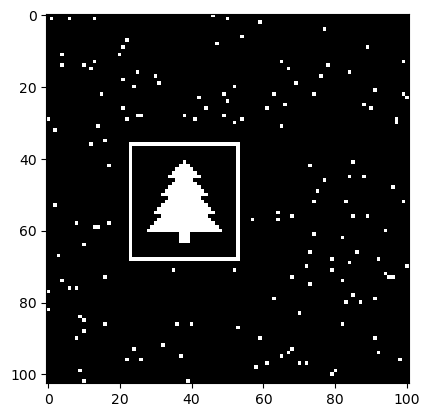

In [49]:
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# file = "inputs/day14_example.txt"
# width, height = 11, 7

file = "inputs/day14.txt"
width, height = 101, 103

def get_robots(file):
    robots = list()
    for line in open(file):
        xpos, ypos, xvel, yvel = map(int, re.findall(r'-?\d+', line))
        robots.append((xpos, ypos, xvel, yvel))
    return robots

def simulate(robots, width, height, steps=100):
    for step in range(steps):
        new_robots = list()
        for xpos, ypos, xvel, yvel in robots:
            xpos += xvel
            ypos += yvel
            
            new_robots.append((xpos % width, ypos % height, xvel, yvel))
        robots = new_robots
    return robots
    


def print_on_maze(robots, width, height, stepnum):
    pos = defaultdict(int)
    for xpos, ypos, _, _ in robots:
        pos[(xpos, ypos)] += 1

    image = np.zeros((height, width), dtype=np.uint8)
    for ypos in range(height):
        for xpos in range(width):
            if pos[(xpos, ypos)] >= 1:
                image[ypos, xpos] = 255

    plt.imshow(image, cmap='gray')
    plt.show()


robots = get_robots(file)
robots = simulate(robots, width, height)
# print_on_maze(robots, width, height, 0)

# Get the counts... Didn't bother to do anything smart here...
left_top_count = 0 
for xpos, ypos, _, _ in robots:
    if xpos < width//2 and ypos < height//2:
        left_top_count += 1
right_top_count = 0
for xpos, ypos, _, _ in robots:
    if xpos > width//2 and ypos < height//2:
        right_top_count += 1
left_bottom_count = 0
for xpos, ypos, _, _ in robots:
    if xpos < width//2 and ypos > height//2:
        left_bottom_count += 1
right_bottom_count = 0
for xpos, ypos, _, _ in robots:
    if xpos > width//2 and ypos > height//2:
        right_bottom_count += 1

# print(left_top_count, right_top_count, left_bottom_count, right_bottom_count)
print('Part 1, safety factor', left_top_count * right_top_count * left_bottom_count * right_bottom_count)

robots = get_robots(file)
for step in range(1, 100_000_000): 
    robots = simulate(robots, width, height, steps=1)
    
    if (step - 79) % 101 == 0 and (step - 22) % 103 == 0:
        print(step)
        print_on_maze(robots, width, height, step)
        break